# Generating FBM Samples wrt Time, using FBM library

* We can observe that increasing hurst parameter, we get smoother relaisations of motion.

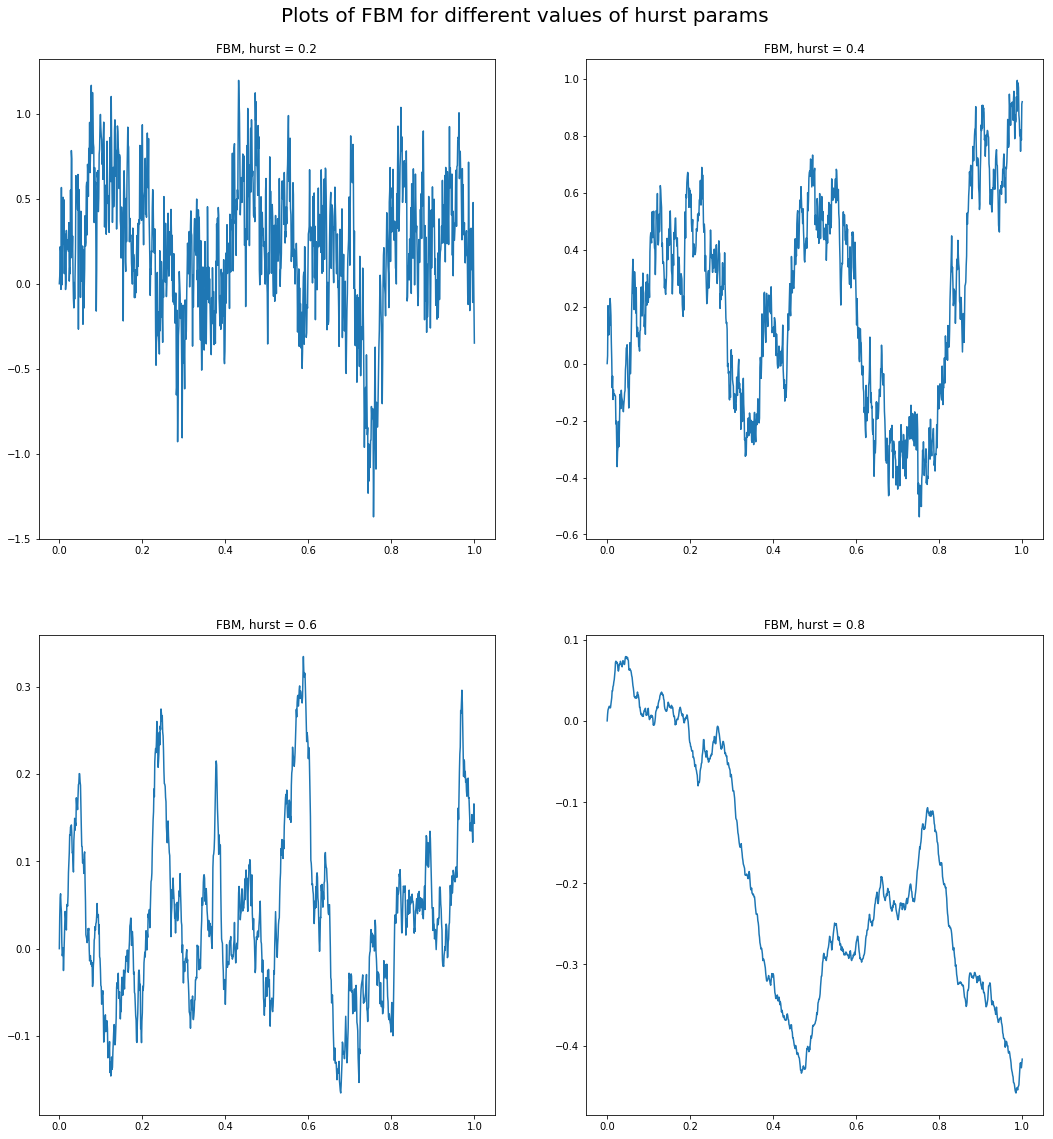

In [2]:
%matplotlib inline

from fbm import FBM
import matplotlib.pyplot as plt
import numpy as np

from scipy.fftpack import fft, ifft, fftfreq

def plt_fbm(h_param,num_samp,subplot_index=111):
    f = FBM(n=num_samp, hurst=h_param, length=1, method='cholesky')
    # Generate a fBm realization
    fbm_sample = f.fbm()

    # Get the times associated with the fBm
    t_values = f.times()
    
    ax= fig.add_subplot(subplot_index)
    ax.set_title("FBM, hurst = "+str(h_param))
    ax.plot(t_values,fbm_sample)
    #print(t_values)
    return fbm_sample

plt.rcParams['figure.figsize'] = (18, 18)
fig = plt.figure()
fig.tight_layout()
fig.subplots_adjust(top=0.94)
fbm_samps=[]
plt.suptitle("Plots of FBM for different values of hurst params",fontsize=20)
num_pts=1000
t_samp=np.linspace(0,1,num_pts+1)
fbm_samps.append(plt_fbm(0.2,num_pts,221))
fbm_samps.append(plt_fbm(0.4,num_pts,222))
fbm_samps.append(plt_fbm(0.6,num_pts,223))
fbm_samps.append(plt_fbm(0.8,num_pts,224))
plt.show()

# Plotting the FFT of FBM motion as well

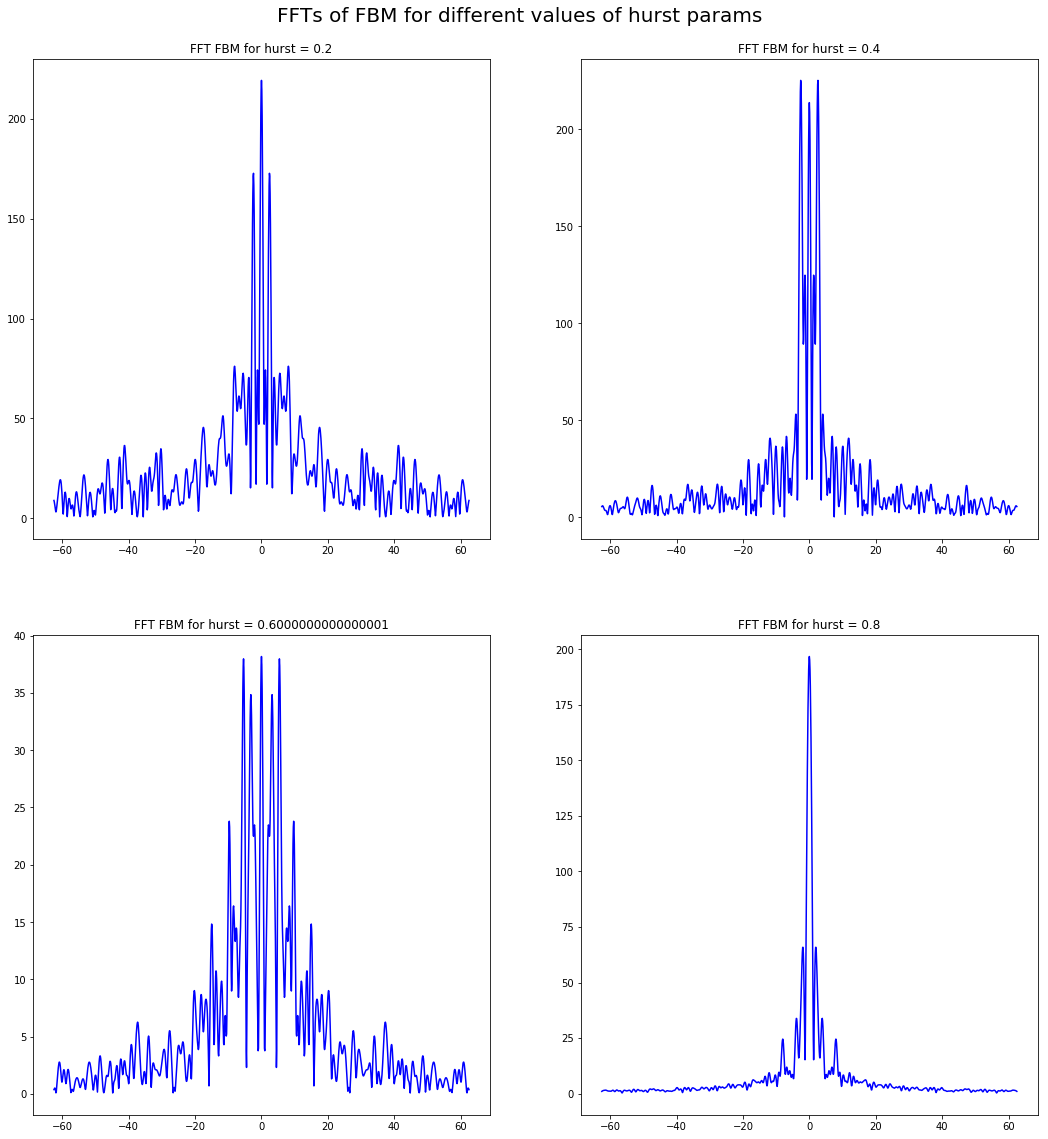

In [3]:
def plot_fft(fbm_vals,hurst,subplot_index=111):
    samp_freq=1000
    NFFT=10*t_samp.shape[0]
    zp_arr=np.append(np.array(fbm_vals),np.zeros(NFFT-len(fbm_vals)))
    fbm_freq=np.fft.fftshift(fft(zp_arr,NFFT))
    disc_w=np.linspace(-samp_freq/16,samp_freq/16,NFFT//8)
    ax= fig.add_subplot(subplot_index)
    ax.set_title("FFT FBM for hurst = "+str(hurst))
    ax.plot(disc_w,abs(fbm_freq[NFFT//2-NFFT//16:NFFT//2+NFFT//16+1]),'b')
    return fbm_freq[0:NFFT//2]

plt.rcParams['figure.figsize'] = (18, 18)
fig = plt.figure()
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.suptitle("FFTs of FBM for different values of hurst params",fontsize=20)
subplot_list=[221,222,223,224]
freq_fbm_samps=[]
for i in range(len(fbm_samps)): 
    freq_fbm_samps.append(plot_fft(fbm_samps[i],0.2*(i+1),subplot_list[i]))
plt.show()


# PCA spectrum of single FBM signals


0.662069594238
0.510126092559
0.490614112379
0.47021877265


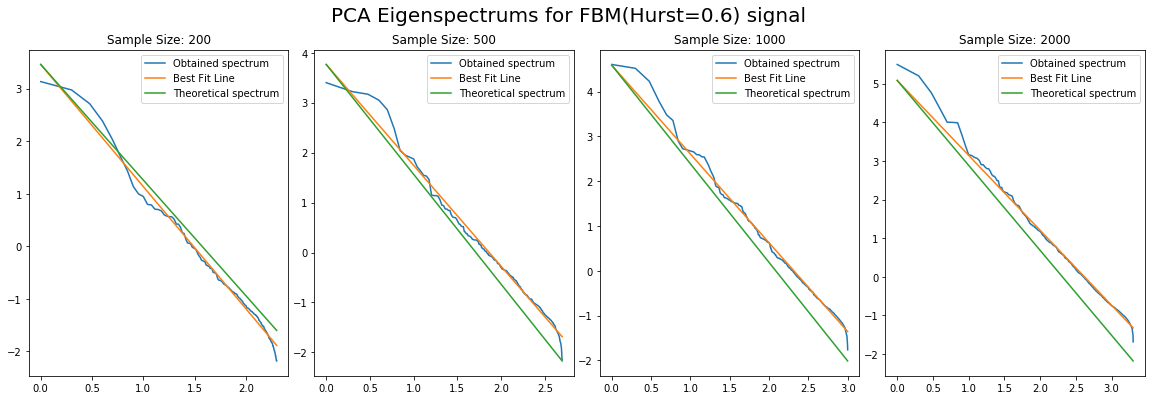

In [104]:
from scipy.ndimage.interpolation import shift
from scipy.linalg import toeplitz,inv,svd
from scipy.optimize import curve_fit

def Lf(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

def plot_diffsamples(sample_size,subplot_index):
    M=sample_size
    H=0.6
    f = FBM(n=M, hurst=H, length=0.5, method='daviesharte')
    # Generate a fBm realization
    fbm_sample = f.fbm()
    # Get the times associated with the fBm
    t_values = f.times()
    #print(t_values)
    # plt.plot(t_values,fbm_sample)
    # plt.show()

    R=np.zeros(M+1) #Autocorrelation: r[0] to r[p-1]

    for k in range(M+1):
        fbm_shift=shift(fbm_sample, k, cval=0)
        R[k]=np.sum(fbm_sample*np.conjugate(fbm_shift))

    AutoCorr_mat=toeplitz(R[0:M],R[0:M])

    num_sim=50
    for i in range(num_sim):
        f1 = FBM(n=M, hurst=H, length=0.5, method='daviesharte')
        # Generate a fBm realization
        if(i==0):
            avg_sample=f1.fgn()
        else:
            avg_sample += f1.fgn()

    #mean_vec=[t_values[i]**(2*H) for i in range(0,M)]
    mean_vec=avg_sample/num_sim
    #print(mean_vec)
    AutoCov_mat=AutoCorr_mat

    U,S,V=svd(AutoCov_mat)
    ax= fig.add_subplot(subplot_index)
    ax.plot(np.log10(np.arange(M)+1),np.log10(S))

    expected_slope=-(2*H+1)
    A,B = curve_fit(Lf,np.log10(np.arange(M)+1),np.log10(S))[0] # your data x, y to fit
    print(-(A+1)/2)
    ax.plot([0,np.log10(M)],[B,A*np.log10(M)+B])
    A=-2.2
    ax.plot([0,np.log10(M)],[B,A*np.log10(M)+B])
    ax.legend(["Obtained spectrum","Best Fit Line","Theoretical spectrum"])
    ax.set_title("Sample Size: "+str(M))

#print(S)
plt.rcParams['figure.figsize'] = (20,6)
fig = plt.figure()
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.suptitle("PCA Eigenspectrums for FBM(Hurst=0.6) signal",fontsize=20)
subplot_list=[141,142,143,144]
sample_sizes=[200,500,1000,2000]
for i in range(4):
    plot_diffsamples(sample_sizes[i],subplot_list[i])
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()


0.382929960533
0.542752381467
0.527053919091


/usr/local/lib/python3.4/dist-packages/fbm/fbm.py:155: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn('Combination of increments n and Hurst value H '


0.47908248772


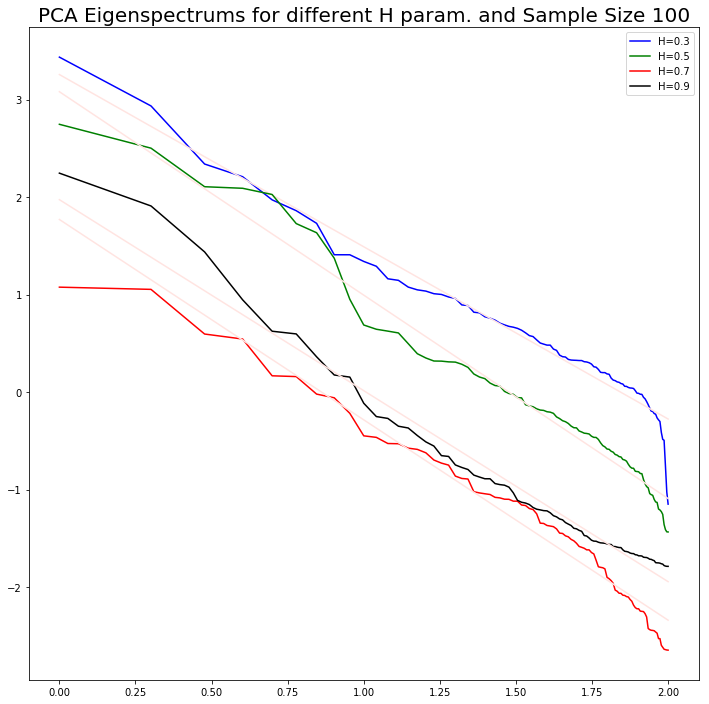

In [108]:
def plot_diffH(H,col):
    M=100    
    f = FBM(n=M, hurst=H, length=0.5, method='daviesharte')
    # Generate a fBm realization
    fbm_sample = f.fbm()
    # Get the times associated with the fBm
    t_values = f.times()
    #print(t_values)
    # plt.plot(t_values,fbm_sample)
    # plt.show()

    R=np.zeros(M+1) #Autocorrelation: r[0] to r[p-1]

    for k in range(M+1):
        fbm_shift=shift(fbm_sample, k, cval=0)
        R[k]=np.sum(fbm_sample*np.conjugate(fbm_shift))

    AutoCorr_mat=toeplitz(R[0:M],R[0:M])

    num_sim=50
    for i in range(num_sim):
        f1 = FBM(n=M, hurst=H, length=0.5, method='daviesharte')
        # Generate a fBm realization
        if(i==0):
            avg_sample=f1.fgn()
        else:
            avg_sample += f1.fgn()

    #mean_vec=[t_values[i]**(2*H) for i in range(0,M)]
    mean_vec=avg_sample/num_sim
    #print(mean_vec)
    AutoCov_mat=AutoCorr_mat

    U,S,V=svd(AutoCov_mat)
    plt.plot(np.log10(np.arange(M)+1),np.log10(S),color=col,label=str("H="+str(H)))

    expected_slope=-(2*H+1)
    A,B = curve_fit(Lf,np.log10(np.arange(M)+1),np.log10(S))[0] # your data x, y to fit
    print(-(A+1)/2)
    plt.plot([0,np.log10(M)],[B,A*np.log10(M)+B],color='mistyrose')
    #ax.set_title("Sample Size: "+str(M))

#print(S)
plt.rcParams['figure.figsize'] = (12, 12)
plt.title("PCA Eigenspectrums for different H param. and Sample Size 100",fontsize=20)
Color=['b','g','r','black']
H=[0.3,0.5,0.7,0.9]
for i in range(4):
    plot_diffH(H[i],Color[i])
#handles, labels = plt.get_legend_handles_labels()
plt.legend()
plt.show()

51


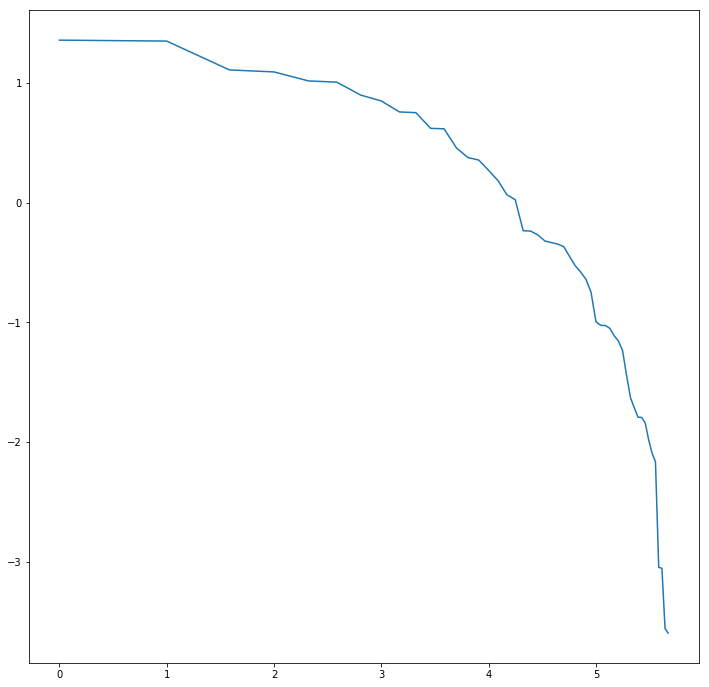

In [112]:
import pywt

def Qf(x, A, B,C): # this is your 'straight line' y=f(x)
    return A*x**2 + B*x + C

def get_wavelet_var(wavelet,H=0.3,est_sil=1):
    samp_size=100
    f = FBM(n=samp_size, hurst=H, length=0.5, method='daviesharte')
    # Generate a fBm realization
    fbm_sample = f.fbm()
    # Get the times associated with the fBm
    t_values = f.times()
    cA, cD = pywt.dwt(fbm_sample, wavelet)
    
    M=len(cD)
    print(M)
    # plt.rcParams['figure.figsize'] = (10, 10)
    # #plt.plot(fbm_sample[::2])
    # #plt.plot(cD)
    # plt.show()
    R=np.zeros(M+1) #Autocorrelation: r[0] to r[p-1]

    for k in range(M+1):
        cD_shift=shift(cD, k, cval=0)
        R[k]=np.sum(cD*np.conjugate(cD_shift))

    AutoCorr_mat=toeplitz(R[0:M],R[0:M])

    num_sim=50
    for i in range(num_sim):
        f1 = FBM(n=samp_size, hurst=H, length=0.5, method='daviesharte')
        # Generate a fBm realization
        if(i==0):
            temp_cA,temp_cD=pywt.dwt(f1.fbm(),wavelet)
            avg_cD=temp_cD
        else:
            temp_cA1,temp_cD=pywt.dwt(f1.fbm(),wavelet)
            avg_cD += temp_cD

    #mean_vec=[t_values[i]**(2*H) for i in range(0,M)]
    mean_vec=avg_cD/num_sim
    #print(AutoCorr_mat)
    #print(np.outer(mean_vec,mean_vec))
    
    AutoCov_mat=AutoCorr_mat-np.outer(mean_vec,mean_vec)
    #print(AutoCov_mat-AutoCorr_mat)

    U,S,V=svd(AutoCov_mat)
    plt.rcParams['figure.figsize'] = (12, 12)
    #print(S)
    #print(S[::-1])
    plt.plot(np.log2(np.arange(M)+1),np.log2(S))

#     expected_slope=-(2*H+1)
#     A,B = curve_fit(Lf,np.log10(np.arange(2,M)),np.log10(S[2:]))[0] # your data x, y to fit
#     if(est_sil==0):
#         x=np.log10(np.arange(M)+1)
#         y=A*x+B
#         plt.plot(x,y)
#     print(-(A+1)/2)
#     return A,B
    #plt.plot([0,np.log10(M)],[B,A*np.log10(M)+B])

get_wavelet_var('haar')
# get_wavelet_var('db2')
# get_wavelet_var('db6')
# get_wavelet_var('db10')
# get_wavelet_var('db20')
# plt.legend(['haar','db2','db6','db10','db20'])
plt.show()

#print(S)


51
51
51
51


/usr/local/lib/python3.4/dist-packages/fbm/fbm.py:155: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn('Combination of increments n and Hurst value H '


51


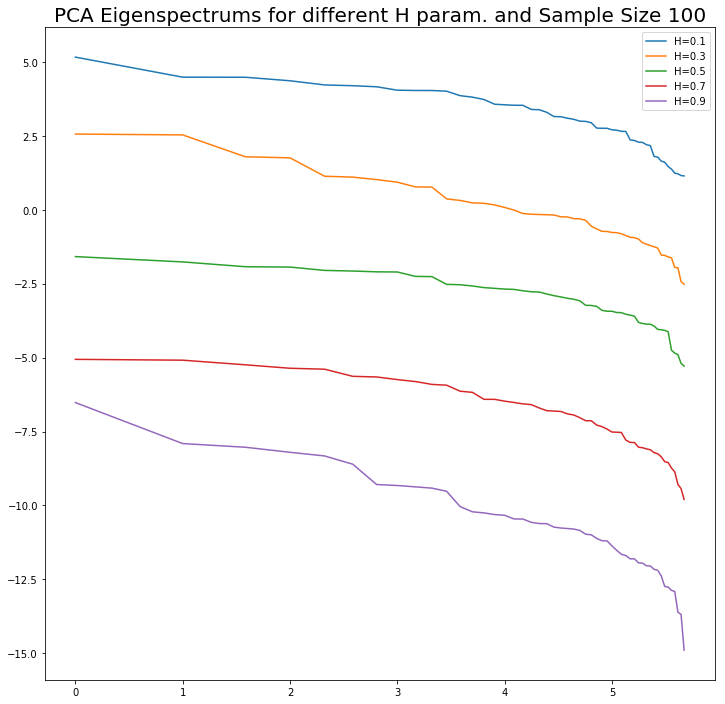

In [114]:
get_wavelet_var('haar',0.1)
get_wavelet_var('haar',0.3)
get_wavelet_var('haar',0.5)
get_wavelet_var('haar',0.7)
get_wavelet_var('haar',0.9)
plt.title("PCA Eigenspectrums for different H param. and Sample Size 100",fontsize=20)
plt.legend(['H=0.1','H=0.3','H=0.5','H=0.7','H=0.9'])
plt.show()

#print(S)


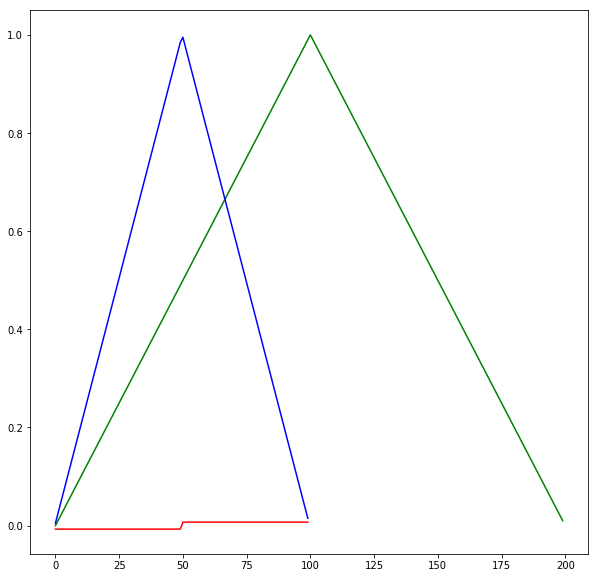

[-0.00707107 -0.00707107 -0.00707107 -0.00707107 -0.00707107 -0.00707107
 -0.00707107 -0.00707107 -0.00707107 -0.00707107 -0.00707107 -0.00707107
 -0.00707107 -0.00707107 -0.00707107 -0.00707107 -0.00707107 -0.00707107
 -0.00707107 -0.00707107 -0.00707107 -0.00707107 -0.00707107 -0.00707107
 -0.00707107 -0.00707107 -0.00707107 -0.00707107 -0.00707107 -0.00707107
 -0.00707107 -0.00707107 -0.00707107 -0.00707107 -0.00707107 -0.00707107
 -0.00707107 -0.00707107 -0.00707107 -0.00707107 -0.00707107 -0.00707107
 -0.00707107 -0.00707107 -0.00707107 -0.00707107 -0.00707107 -0.00707107
 -0.00707107 -0.00707107  0.00707107  0.00707107  0.00707107  0.00707107
  0.00707107  0.00707107  0.00707107  0.00707107  0.00707107  0.00707107
  0.00707107  0.00707107  0.00707107  0.00707107  0.00707107  0.00707107
  0.00707107  0.00707107  0.00707107  0.00707107  0.00707107  0.00707107
  0.00707107  0.00707107  0.00707107  0.00707107  0.00707107  0.00707107
  0.00707107  0.00707107  0.00707107  0.00707107  0

In [7]:
tr_wave =np.zeros(200)
for i in range(200):
    tr_wave[i]= min(i,200-i)/100
tr_cA, tr_cD = pywt.dwt(tr_wave, 'haar')
plt.plot([i for i in range(len(tr_wave))], tr_wave,'g')
plt.plot([i for i in range(len(tr_cA))], tr_cA/1.414,'b')
plt.plot([i for i in range(len(tr_cD))], tr_cD,'r')
plt.show()
print(tr_cD)

/usr/local/lib/python3.4/dist-packages/fbm/fbm.py:155: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn('Combination of increments n and Hurst value H '


3.59741526207:2.23758478401:-1.07581072018:(-1.3832426262963384, 1.0259886480506606):


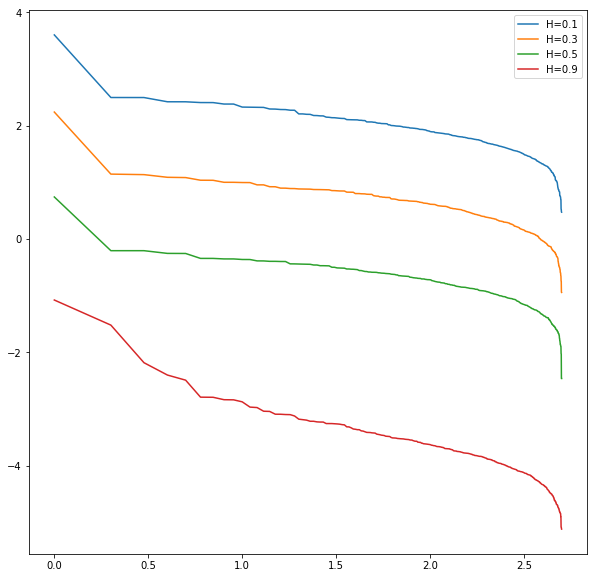

In [124]:
import pywt

def Lf(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

def Qf(x, A, B,C): # this is your 'straight line' y=f(x)
    return A*x**2 + B*x + C

def get_wavelet_var(wavelet,H=0.3,samp_size=150,plot_sil=0,print_sil=0):
    
    f = FBM(n=samp_size, hurst=H, length=0.5, method='daviesharte')
    # Generate a fBm realization
    fbm_sample = f.fbm()
    # Get the times associated with the fBm
    t_values = f.times()
    cA, cD = pywt.dwt(fbm_sample, wavelet)
    
#     M=len(cD)//2
#     #print(M)
#     AutoCorr_mat=np.zeros((M+1,M+1))
#     for j in range(M+1):
#         orig_seq=cD[j:M+j]
#         for k in range(M+1):
#             shift_seq=cD[k:M+k]
#             AutoCorr_mat[j][k]=np.sum(orig_seq*np.conjugate(shift_seq))

    M=len(cD)
    R=np.zeros(M+1) #Autocorrelation: r[0] to r[p-1]
    for k in range(M+1):
        cD_shift=shift(cD, k, cval=0)
        R[k]=np.sum(cD*np.conjugate(cD_shift))

    AutoCorr_mat=toeplitz(R[0:M],R[0:M])
    sigma2_2=R[0]/2
    
    K=np.abs(np.min(R[0:M]))
    AutoCorr_mat=AutoCorr_mat+K
    mean_corr=(np.sum(AutoCorr_mat)-M*AutoCorr_mat[0][0])/(M**2-M)
    U,S,V=svd(AutoCorr_mat)
    
    if(plot_sil!=1):
        ax.plot(np.log10(np.arange(M)+1)\
                ,np.log10(S[0:M]),label=str("H="+str(H)))
            
    #print(S[0])
    #print(1+(M-1)*mean_corr)
    est_S=1+((2*M**(2*H-1)*(2*H-1))*sigma2_2)+(M-1)*K
    return np.log10(S[0])

plt.rcParams['figure.figsize'] = (10, 10)
fig = plt.figure()
ax= fig.add_subplot(111)
h0=get_wavelet_var('haar',0.1,samp_size=1000)
h1=get_wavelet_var('haar',0.3,samp_size=1000)
h2=get_wavelet_var('haar',0.5,samp_size=1000)
h2=get_wavelet_var('haar',0.9,samp_size=1000)
#h3=get_wavelet_var('haar',0.7,samp_size=1000)
print(str(h0)+":"+str(h1)+":"+str(h2)+":"+str(h3)+":")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

0.180779873818
0.594729707118
0.255104332708
0.779435466399
0.261872293163
1.12350730184
0.52892308911
1.50154390745


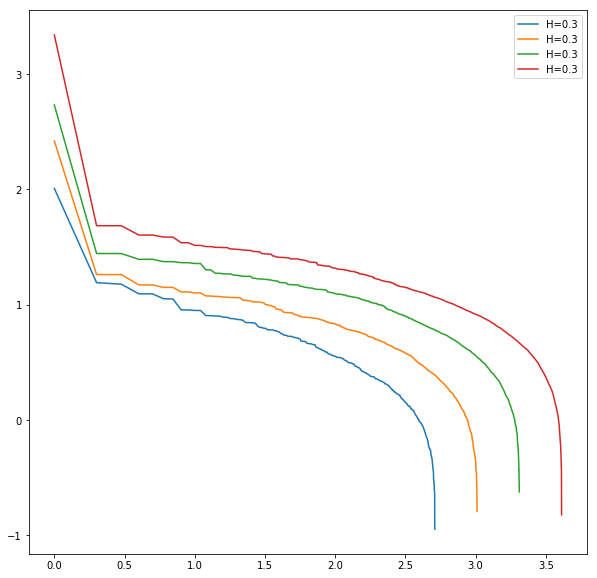

In [117]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = plt.figure()
ax= fig.add_subplot(111)
get_wavelet_var('haar',0.3,1024,plot_sil=0)
get_wavelet_var('haar',0.3,2048,plot_sil=0)
get_wavelet_var('haar',0.3,4096,plot_sil=0)
get_wavelet_var('haar',0.3,8192,plot_sil=0)
#get_wavelet_var('haar',0.3,16384,est_sil=0,plot_sil=0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

-0.138501467593 0.645007754851


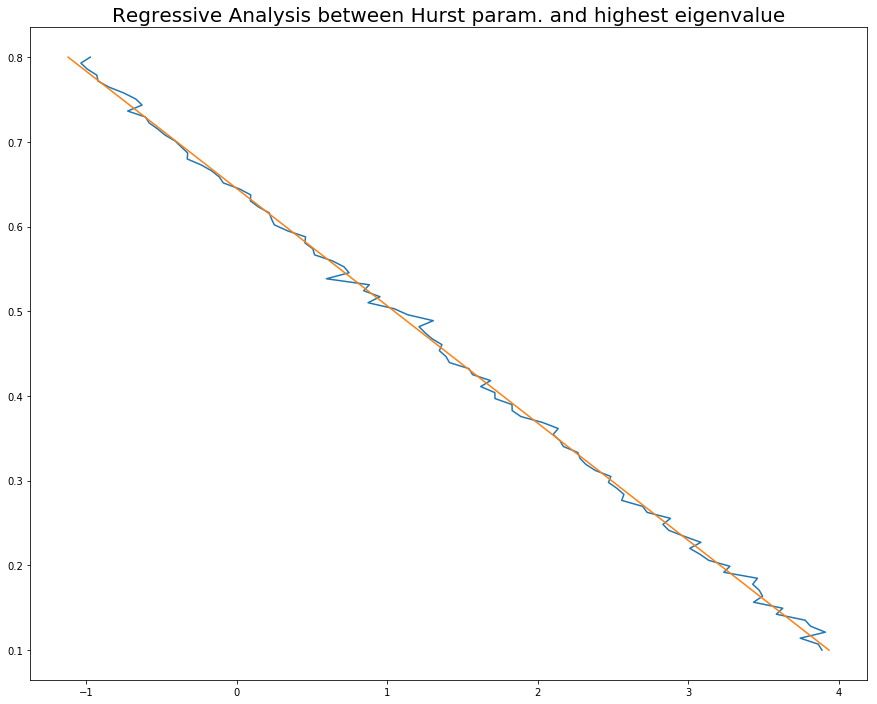

In [122]:
H_list=np.linspace(0.1,0.8,100)
intercept_vs_H=[get_wavelet_var('haar',H,2000,plot_sil=1,print_sil=1) for H in H_list]
plt.rcParams['figure.figsize'] = (15, 12)
plt.plot(intercept_vs_H,H_list)
A,B = curve_fit(Lf,intercept_vs_H,H_list)[0] # your data x, y to fit
plt.plot([(0.1-B)/A,(0.8-B)/A],[0.1,0.8])
plt.title("Regressive Analysis between Hurst param. and highest eigenvalue",fontsize=20)
print(A,B)
plt.show()

0.000114470748747 2.26786292484


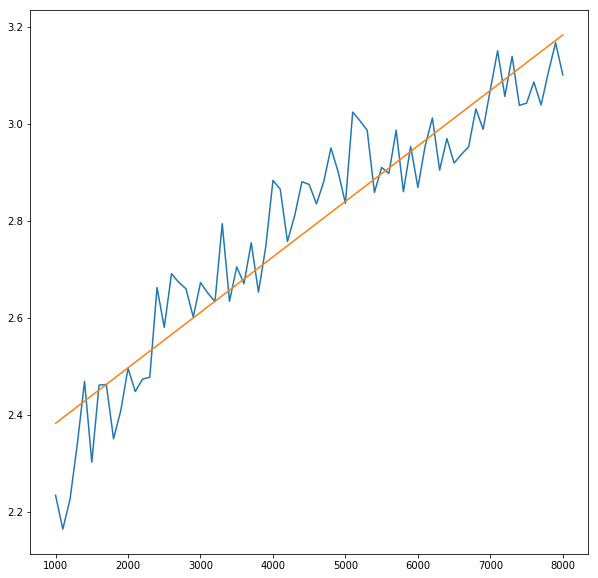

In [123]:
samp_list=np.linspace(1000,8000,71)
intercept_vs_samp=[get_wavelet_var('haar',0.3,int(samp),plot_sil=1,print_sil=1) for samp in samp_list]
plt.rcParams['figure.figsize'] = (10, 10)
plt.plot(samp_list,intercept_vs_samp)
A,B = curve_fit(Lf,samp_list,intercept_vs_samp)[0] # your data x, y to fit
plt.plot([1000,8000],[1000*A+B,8000*A+B])
print(A,B)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = plt.figure()
ax= fig.add_subplot(111)
get_wavelet_var('haar',0.6,1024,est_sil=1,plot_sil=0)
get_wavelet_var('db2',0.6,1024,est_sil=1,plot_sil=0)
get_wavelet_var('db4',0.6,1024,est_sil=1,plot_sil=0)
get_wavelet_var('db20',0.6,1024,est_sil=1,plot_sil=0)
#get_wavelet_var('haar',0.3,16384,est_sil=0,plot_sil=0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()


In [ ]:
import pywt

def Lf(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

def Qf(x, A, B,C): # this is your 'straight line' y=f(x)
    return A*x**2 + B*x + C

def get_wavelet_var(wavelet,H=0.3,samp_size=150,est_sil=0,plot_sil=0,print_sil=0):
    
    f = FBM(n=samp_size, hurst=H, length=0.5, method='daviesharte')
    # Generate a fBm realization
    fbm_sample = f.fbm()
    # Get the times associated with the fBm
    t_values = f.times()
    cA, cD = pywt.dwt(fbm_sample, wavelet)
    
    M=len(cD)
    #print(M)
    R=np.zeros(M+1) #Autocorrelation: r[0] to r[p-1]

    for k in range(M+1):
        cD_shift=shift(cD, k, cval=0)
        R[k]=np.sum(cD*np.conjugate(cD_shift))

    AutoCorr_mat=toeplitz(R[0:M],R[0:M])

    M=len(cD)//2
    #print(M)
    AutoCorr_mat_orig=np.zeros((M+1,M+1))
    for j in range(M+1):
        orig_seq=fbm_sample[j:M+j]
        for k in range(M+1):
            shift_seq=fbm_sample[k:M+k]
            AutoCorr_mat_orig[j][k]=np.sum(orig_seq*np.conjugate(shift_seq))
    
    U,S,V=svd(AutoCorr_mat_orig)
    num_elem=int(0.2*M)
    if(print_sil!=1):
        print(num_elem)
    if(est_sil!=1):
        if(num_elem%2==1):
            A,B = curve_fit(Lf,(np.arange(num_elem)+M//2-num_elem//2)\
                                ,np.log10(S[M//2-num_elem//2:M//2+num_elem//2+1]))[0] # your data x, y to fit
        else:
            A,B = curve_fit(Lf,(np.arange(num_elem)+M//2-num_elem//2)\
                            ,np.log10(S[M//2-num_elem//2:M//2+num_elem//2]))[0] # your data x, y to fit
        #print(A,B)
    if(plot_sil!=1):
        ax.plot(np.arange(M)\
                ,np.log10(S[0:M]),label=str("H="+str(H)))
        if(est_sil!=1):
            plt.plot([-500,M],[B-500*A,A*(M)+B])
            
    if(est_sil!=1):
        if(print_sil!=1):
            print(A,B)
        return B

plt.rcParams['figure.figsize'] = (10, 10)
fig = plt.figure()
ax= fig.add_subplot(111)
get_wavelet_var('haar',0.3)
# get_wavelet_var('haar',0.3,plot_sil=0)
# get_wavelet_var('haar',0.5,plot_sil=0)
# get_wavelet_var('haar',0.7,plot_sil=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

$\lambda_1 = 1+(M-1)(\frac{1}{\frac{M(M-1)}{2}}\sum_{p=1}^{M-1}pR[p]+|min_{p}(R[p])|)$